In [887]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
#from xgboost import XGBClassifier

In [3]:
titanic_dataset = pd.read_csv('spaceship-titanic/train.csv')

In [4]:
titanic_dataset.head(  )

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
!pip install XGBoost

In [6]:
test_titanic_dt = pd.read_csv('spaceship-titanic/test.csv')

In [7]:
test_titanic_dt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
titanic_dataset.shape

(8693, 14)

In [9]:
titanic_dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
titanic_dataset.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

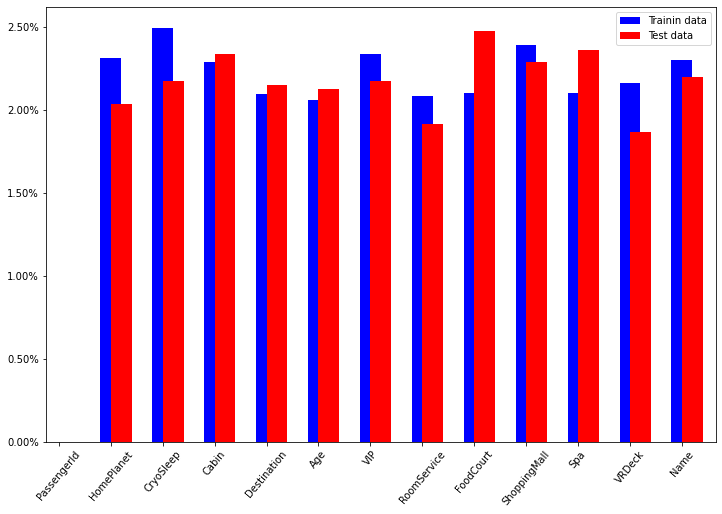

In [12]:
fig , ax = plt.subplots(1,1, figsize = (12,8))
(titanic_dataset.isnull().mean()*100).plot(kind= 'bar',ax=ax, align = 'center', width=.4, color = 'blue')
(test_titanic_dt.isnull().mean()*100).plot(kind='bar', ax =ax, align='edge', width=.4, color='red')
plt.legend(labels=['Trainin data','Test data'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='x', labelrotation=50)


In [13]:
test_titanic_dt.isna().sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

Text(0.5, 1.0, 'Traget Value')

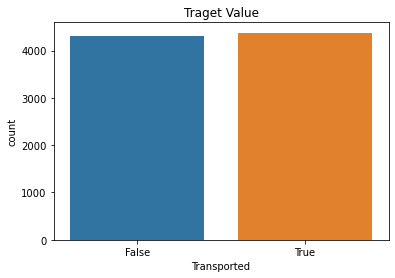

In [14]:
sns.countplot(x='Transported', data=titanic_dataset)
plt.title('Traget Value')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

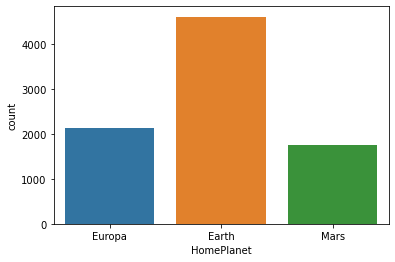

In [15]:
sns.countplot(titanic_dataset.HomePlanet)

In [16]:
p_planet = titanic_dataset['HomePlanet'].value_counts(normalize=True).round(decimals=3)*100
p_planet

Earth     54.2
Europa    25.1
Mars      20.7
Name: HomePlanet, dtype: float64

<AxesSubplot:>

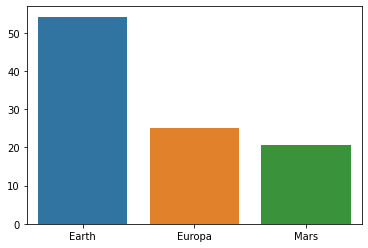

In [833]:
fig, ax = plt.subplots(1,1)
sns.barplot(x=p_planet.index,y=p_planet.values, ax=ax,)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

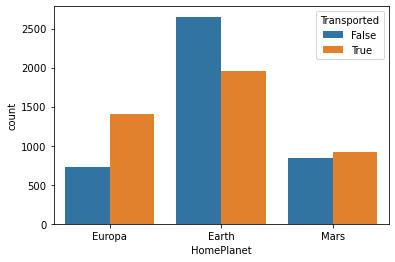

In [834]:
sns.countplot(x='HomePlanet', hue= 'Transported', data=titanic_dataset)

Text(0.5, 0.98, 'Laxury')

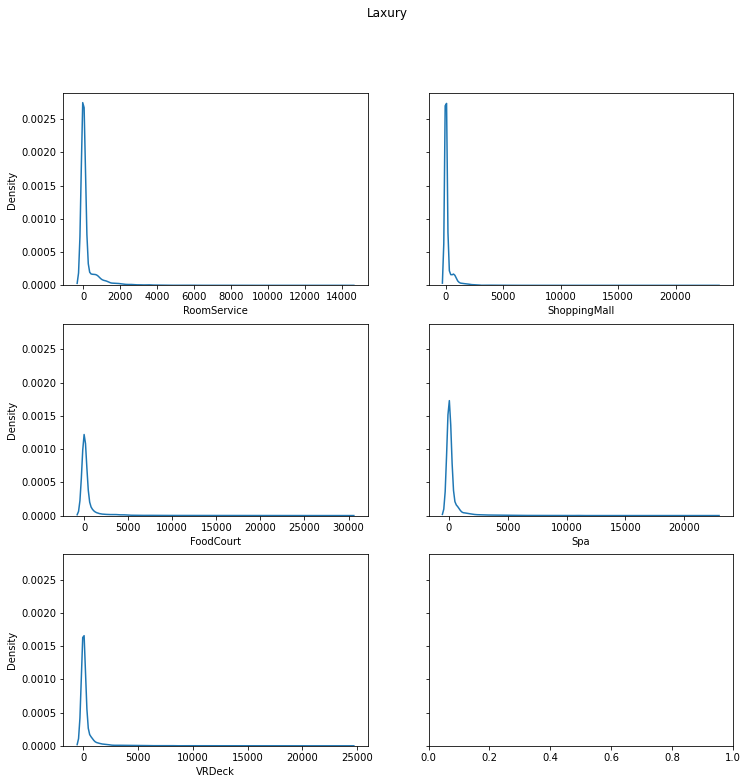

In [835]:
fig, ax = plt.subplots(3,2, figsize=(12,12),sharey=True)
sns.kdeplot(titanic_dataset.RoomService, ax=ax[0,0])
sns.kdeplot(titanic_dataset.ShoppingMall, ax=ax[0,1])
sns.kdeplot(titanic_dataset.FoodCourt, ax=ax[1,0])
sns.kdeplot(titanic_dataset.Spa, ax=ax[1,1])
sns.kdeplot(titanic_dataset.VRDeck, ax=ax[2,0])
plt.suptitle('Laxury')


In [836]:
titanic_dataset['Spa'].fillna(titanic_dataset['Spa'].median(), inplace=True)
titanic_dataset['ShoppingMall'].fillna(titanic_dataset['ShoppingMall'].median(), inplace = True)
titanic_dataset['VRDeck'].fillna(titanic_dataset['VRDeck'].median(), inplace=True)
titanic_dataset['RoomService'].fillna(titanic_dataset['RoomService'].median(), inplace=True)
titanic_dataset['FoodCourt'].fillna(titanic_dataset['FoodCourt'].median(), inplace = True)


In [837]:
test_titanic_dt['Spa'].fillna(test_titanic_dt['Spa'].median(), inplace=True)
test_titanic_dt['ShoppingMall'].fillna(test_titanic_dt['ShoppingMall'].median(), inplace = True)
test_titanic_dt['VRDeck'].fillna(test_titanic_dt['VRDeck'].median(), inplace=True)
test_titanic_dt['RoomService'].fillna(test_titanic_dt['RoomService'].median(), inplace=True)
test_titanic_dt['FoodCourt'].fillna(test_titanic_dt['FoodCourt'].median(), inplace = True)

In [838]:
titanic_dataset = titanic_dataset.fillna(titanic_dataset.agg(lambda x: pd.Series.mode(x)[0], axis = 0))
test_titanic_dt = test_titanic_dt.fillna(test_titanic_dt.agg(lambda x: pd.Series.mode(x)[0], axis = 0))

In [839]:
titanic_dataset.isna().sum().sort_values(ascending=False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [840]:
test_titanic_dt.isna().sum().sort_values(ascending = False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [841]:
titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [842]:
titanic_dataset[['Deck', 'Num', 'Slide']] = titanic_dataset['Cabin'].str.split('/', 2, expand= True )
test_titanic_dt[['Deck', 'Num', 'Slide']] = test_titanic_dt['Cabin'].str.split('/', 2, expand=True)

In [843]:
titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Slide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [844]:
test_titanic_dt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Slide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


<AxesSubplot:xlabel='Deck', ylabel='count'>

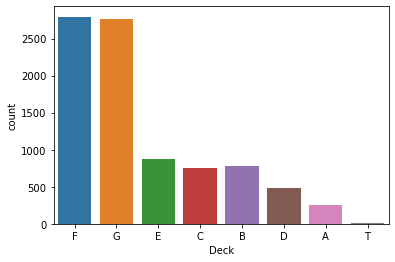

In [845]:

sns.countplot(x = 'Deck',order=['F','G','E','C','B','D','A','T'], data=titanic_dataset)

In [846]:
titanic_dataset.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Slide           0
dtype: int64

In [847]:
titanic_dataset['Num'].fillna(titanic_dataset['Num'].mode()[0], inplace=True)
test_titanic_dt['Num'].fillna(test_titanic_dt['Num'].mode()[0], inplace=True)

In [848]:
titanic_dataset.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Slide           0
dtype: int64

In [849]:
titanic_dataset['Num']= titanic_dataset['Num'].astype('int64')
test_titanic_dt['Num']= test_titanic_dt['Num'].astype('int64')

In [850]:
titanic_dataset.info()
test_titanic_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8693 non-null   object 
 15  Num           8693 non-null   int64  
 16  Slide         8693 non-null   object 
dtypes: bool(3), float64(6), int64(1), object(7)
memory usage: 976.4+ KB
<cl

In [851]:
titanic_dataset['Num'].head()

0    0
1    0
2    0
3    0
4    1
Name: Num, dtype: int64

In [852]:
def num_group(s):
    if (s >=0) & (s <=300):
        return 1
    elif (s >300) & (s<=600):
        return 2
    elif (s >600) & (s<=900):
        return 3
    elif (s >900) & (s<=1200):
        return 4
    elif (s >1200) & (s<=1500):
        return 5
    elif (s > 1500):
        return 6
    


titanic_dataset['Num_group'] = titanic_dataset['Num'].apply(num_group)
test_titanic_dt['Num_group'] = test_titanic_dt['Num'].apply(num_group)

In [853]:
titanic_dataset['Num_group'].isna().sum()

0

In [854]:
titanic_dataset.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Slide,Num_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1


<AxesSubplot:xlabel='Num_group', ylabel='count'>

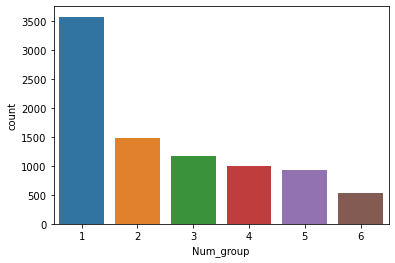

In [855]:
sns.countplot(x='Num_group',data=titanic_dataset)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_group', ylabel='count'>

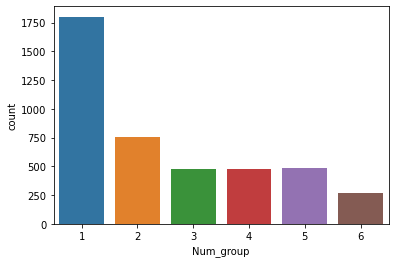

In [856]:
sns.countplot(test_titanic_dt.Num_group)

In [857]:
titanic_dataset[['Group_ID', 'Personal_ID']] = titanic_dataset['PassengerId'].str.split('_', 1, expand=True)
test_titanic_dt[['Group_ID', 'Personal_ID']] = test_titanic_dt['PassengerId'].str.split('_',1, expand=True)

In [858]:



titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Slide,Num_group,Group_ID,Personal_ID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,1,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,1,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,1,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1,0004,01


In [859]:
test_titanic_dt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Slide,Num_group,Group_ID,Personal_ID
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,1,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,1,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,1,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,1,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,1,0023,01


In [860]:
titanic_dataset['Grouped']=0
test_titanic_dt['Grouped']=0

titanic_dataset['Grouped']= titanic_dataset['Group_ID'].duplicated(keep=False).astype(int).astype('int64')
test_titanic_dt['Grouped']= test_titanic_dt['Group_ID'].duplicated(keep=False).astype(int).astype('int64')

In [861]:
titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Deck,Num,Slide,Num_group,Group_ID,Personal_ID,Grouped
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,0,P,1,0001,01,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,0,S,1,0002,01,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,A,0,S,1,0003,01,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,A,0,S,1,0003,02,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,F,1,S,1,0004,01,0


In [862]:
test_titanic_dt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Slide,Num_group,Group_ID,Personal_ID,Grouped
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,1,0013,01,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,1,0018,01,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,1,0019,01,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,1,0021,01,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,1,0023,01,0


In [863]:
titanic_dataset.drop(['Num', 'Group_ID','Personal_ID'],axis=1, inplace=True)

In [864]:
test_titanic_dt.drop(['Num', 'Group_ID','Personal_ID'],axis=1, inplace=True)

In [865]:
titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Slide,Num_group,Grouped
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1,0


In [866]:
test_titanic_dt.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Slide,Num_group,Grouped
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S,1,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S,1,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S,1,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S,1,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S,1,0


In [867]:
# titanic_dataset=titanic_dataset.drop(['PassengerId','Cabin'], axis=1)
titanic_dataset.drop(['Age','Name','PassengerId','Cabin'], axis=1, inplace=True)
test_titanic_dt.drop(['Age','Name','PassengerId','Cabin'], axis=1, inplace=True)

In [868]:
test_titanic_dt.head()



,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Slide,Num_group,Grouped
0,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,G,S,1,0
1,Earth,False,TRAPPIST-1e,False,0.0,9.0,0.0,2823.0,0.0,F,S,1,0
2,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,C,S,1,0
3,Europa,False,TRAPPIST-1e,False,0.0,6652.0,0.0,181.0,585.0,C,S,1,0
4,Earth,False,TRAPPIST-1e,False,10.0,0.0,635.0,0.0,0.0,F,S,1,0


In [869]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=['HomePlanet'])
titanic_dataset = pd.get_dummies(titanic_dataset, columns=['Destination'])
test_titanic_dt = pd.get_dummies(test_titanic_dt, columns=['HomePlanet'])
test_titanic_dt = pd.get_dummies(test_titanic_dt, columns=['Destination'])

In [876]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=['Deck'])
test_titanic_dt = pd.get_dummies(test_titanic_dt, columns=['Deck'])

In [877]:
X_train = titanic_dataset.drop('Transported', axis = 1)
y_train = titanic_dataset['Transported']
X_test = test_titanic_dt

In [878]:
le = LabelEncoder()
cols = ['CryoSleep', 'Slide']

def LE(train_df, test_df):
    for col in cols:
        
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.fit_transform(test_df[col])
    return train_df, test_df


titanic_dataset, test_titanic_dt = LE(titanic_dataset, test_titanic_dt)

In [879]:
test_titanic_dt.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Slide,Num_group,Grouped,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,False,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,False,0.0,9.0,0.0,2823.0,0.0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,False,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,False,0.0,6652.0,0.0,181.0,585.0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,False,10.0,0.0,635.0,0.0,0.0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [880]:
#titanic_dataset.replace({'CryoSleep':{'True':1, 'False':0}}, inplace=True)
#titanic_dataset.replace({'VIP':{'False':0, 'True':1}}, inplace=True)


#test_titanic_dt= test_titanic_dt.drop(['PassengerId','Cabin'], axis=1)
#test_titanic_dt.replace({'VIP':{'True':1, 'False':0}}, inplace=True)

In [881]:
test_titanic_dt.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Slide,Num_group,Grouped,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,False,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,False,0.0,9.0,0.0,2823.0,0.0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,False,0.0,0.0,0.0,0.0,0.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,False,0.0,6652.0,0.0,181.0,585.0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,False,10.0,0.0,635.0,0.0,0.0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [882]:
rfc=RandomForestClassifier()
parameters = {
    "n_estimators": [200,300,400], 
    "max_features": [3, 5, 10],
    "min_samples_leaf" : [3, 5,10],
    
}

rfc_grid = GridSearchCV(rfc, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs= -1)
rfc_grid.fit(X_train, y_train)
print('Best Parameters : ', rfc_grid.best_params_)
print('-'*50)
print('Best Accuracy : ', rfc_grid.best_score_)

Best Parameters :  {'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 400}
--------------------------------------------------
Best Accuracy :  0.8009928592745721


In [ ]:
param_grid = {'n_estimators': [200,300,400],
              'learning_rate': [0.01, 0.05, 0.1, 0.5],
              'eval_metric': ['mlogloss'],
              'objective':['reg:logistic'],
              'max_depth': [5,10,15],}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_params = grid.best_params_
print('Best score of cross validation: {:.2f}'.format(grid.best_score_))
print('-'*50)
print('Best parameters:', best_params)